In [ ]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(0)

# Scaling vs. Normalization: What's the difference?

One of the reasons that it's easy to get confused between scaling and normalization is because the terms are sometimes used interchangeably and, to make it even more confusing, they are very similar! In both cases, you're transforming the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that:

in scaling, you're changing the range of your data, while
in normalization, you're changing the shape of the distribution of your data.
Let's talk a little more in-depth about each of these options.

# Scaling

Scaling means changing your numbers so they fit into the same range, like between 0 and 1, or 0 and 100.

Why is this important? Imagine you have two things you’re measuring: the price of a product in dollars and in yen. One dollar is about 100 yen. If we don’t scale the numbers, the computer will think that “1 yen” and “1 dollar” are equally important, even though they are not.

The same problem happens when comparing different things, like height (in meters) and weight (in kilograms). Without scaling, the computer won’t know how to fairly compare them.

By scaling, we make sure all numbers are on the same “level,” so the computer doesn’t get confused when comparing them.

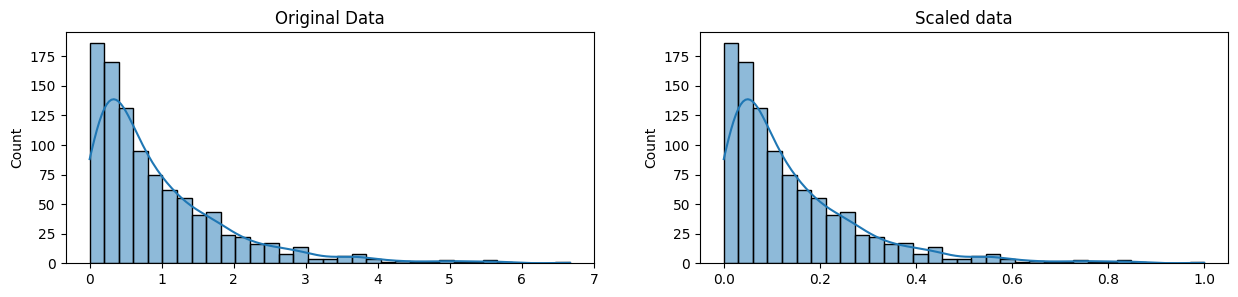

In [22]:
original_data = np.random.exponential(size = 1000)

scaled_data = minmax_scaling(original_data, columns = [0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

Notice that the shape doesn't change, but that instead of ranging from 0 to 8ish, it now ranges from 0 to 1.

# Normalization

Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.

Normal distribution: Also known as the "bell curve", this is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.

In general, you'll normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with "Gaussian" in the name probably assumes normality.)

The method we're using to normalize here is called the Box-Cox Transformation. Let's take a quick peek at what normalizing some data looks like:


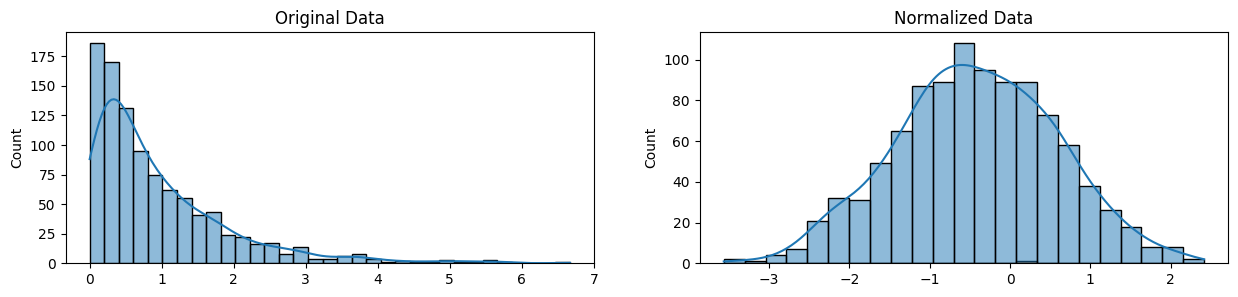

In [23]:
normalized_data = stats.boxcox(original_data)

fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax = ax[0], kde = True, legend = False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data, ax = ax[1], kde = True, legend = False)
ax[1].set_title("Normalized Data")
plt.show()

Notice that the shape of our data has changed. Before normalizing it was almost L-shaped. But after normalizing it looks more like the outline of a bell (hence "bell curve").